# Regression Project - Concrete

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

C:\Users\Alp\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('Concrete_Data.csv')

In [3]:
df.head(3)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [16]:
df.corr()['csMPa'].sort_values()

water              -0.289633
fineaggregate      -0.167241
coarseaggregate    -0.164935
flyash             -0.105755
slag                0.134829
age                 0.328873
superplasticizer    0.366079
cement              0.497832
csMPa               1.000000
Name: csMPa, dtype: float64

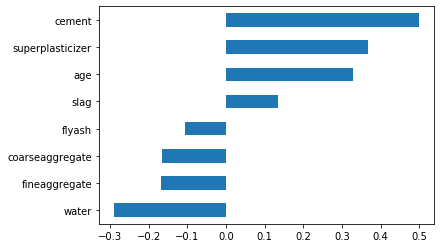

In [7]:
df.corr()['csMPa'].sort_values().head(11)[:-1].plot.barh();

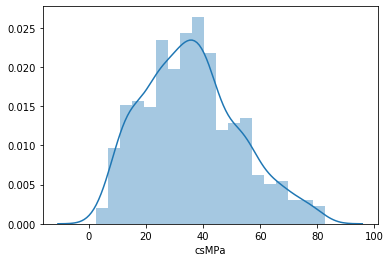

In [8]:
sns.distplot(df.csMPa);

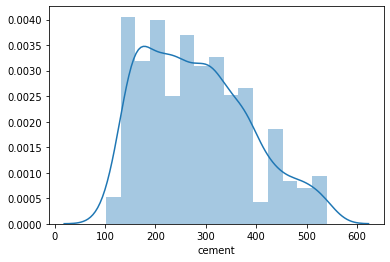

In [9]:
sns.distplot(df.cement);

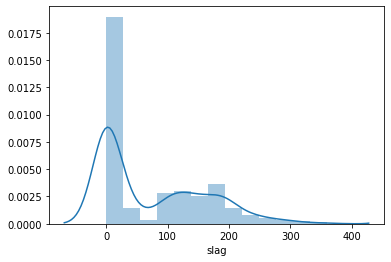

In [10]:
sns.distplot(df.slag);

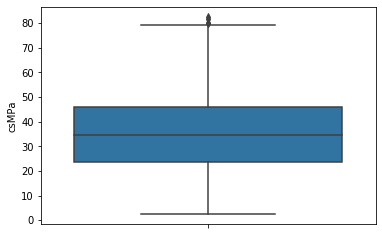

In [11]:
sns.boxplot(df.csMPa, orient = 'v')

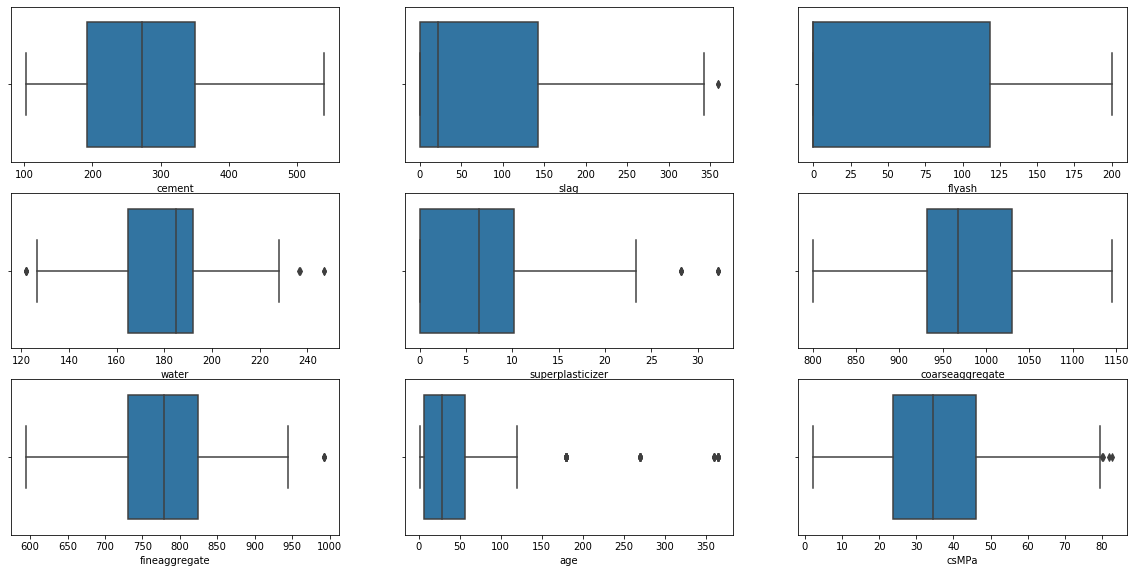

In [12]:
fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df.iloc[ : , col])
plt.show()

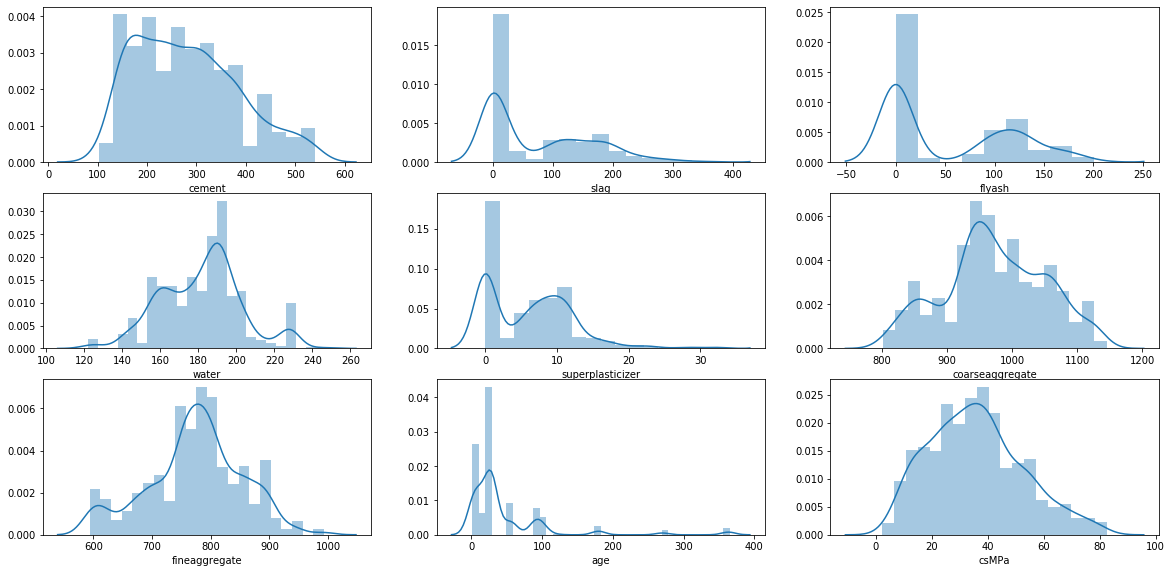

In [13]:
fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.distplot(df.iloc[ : , col])
plt.show()

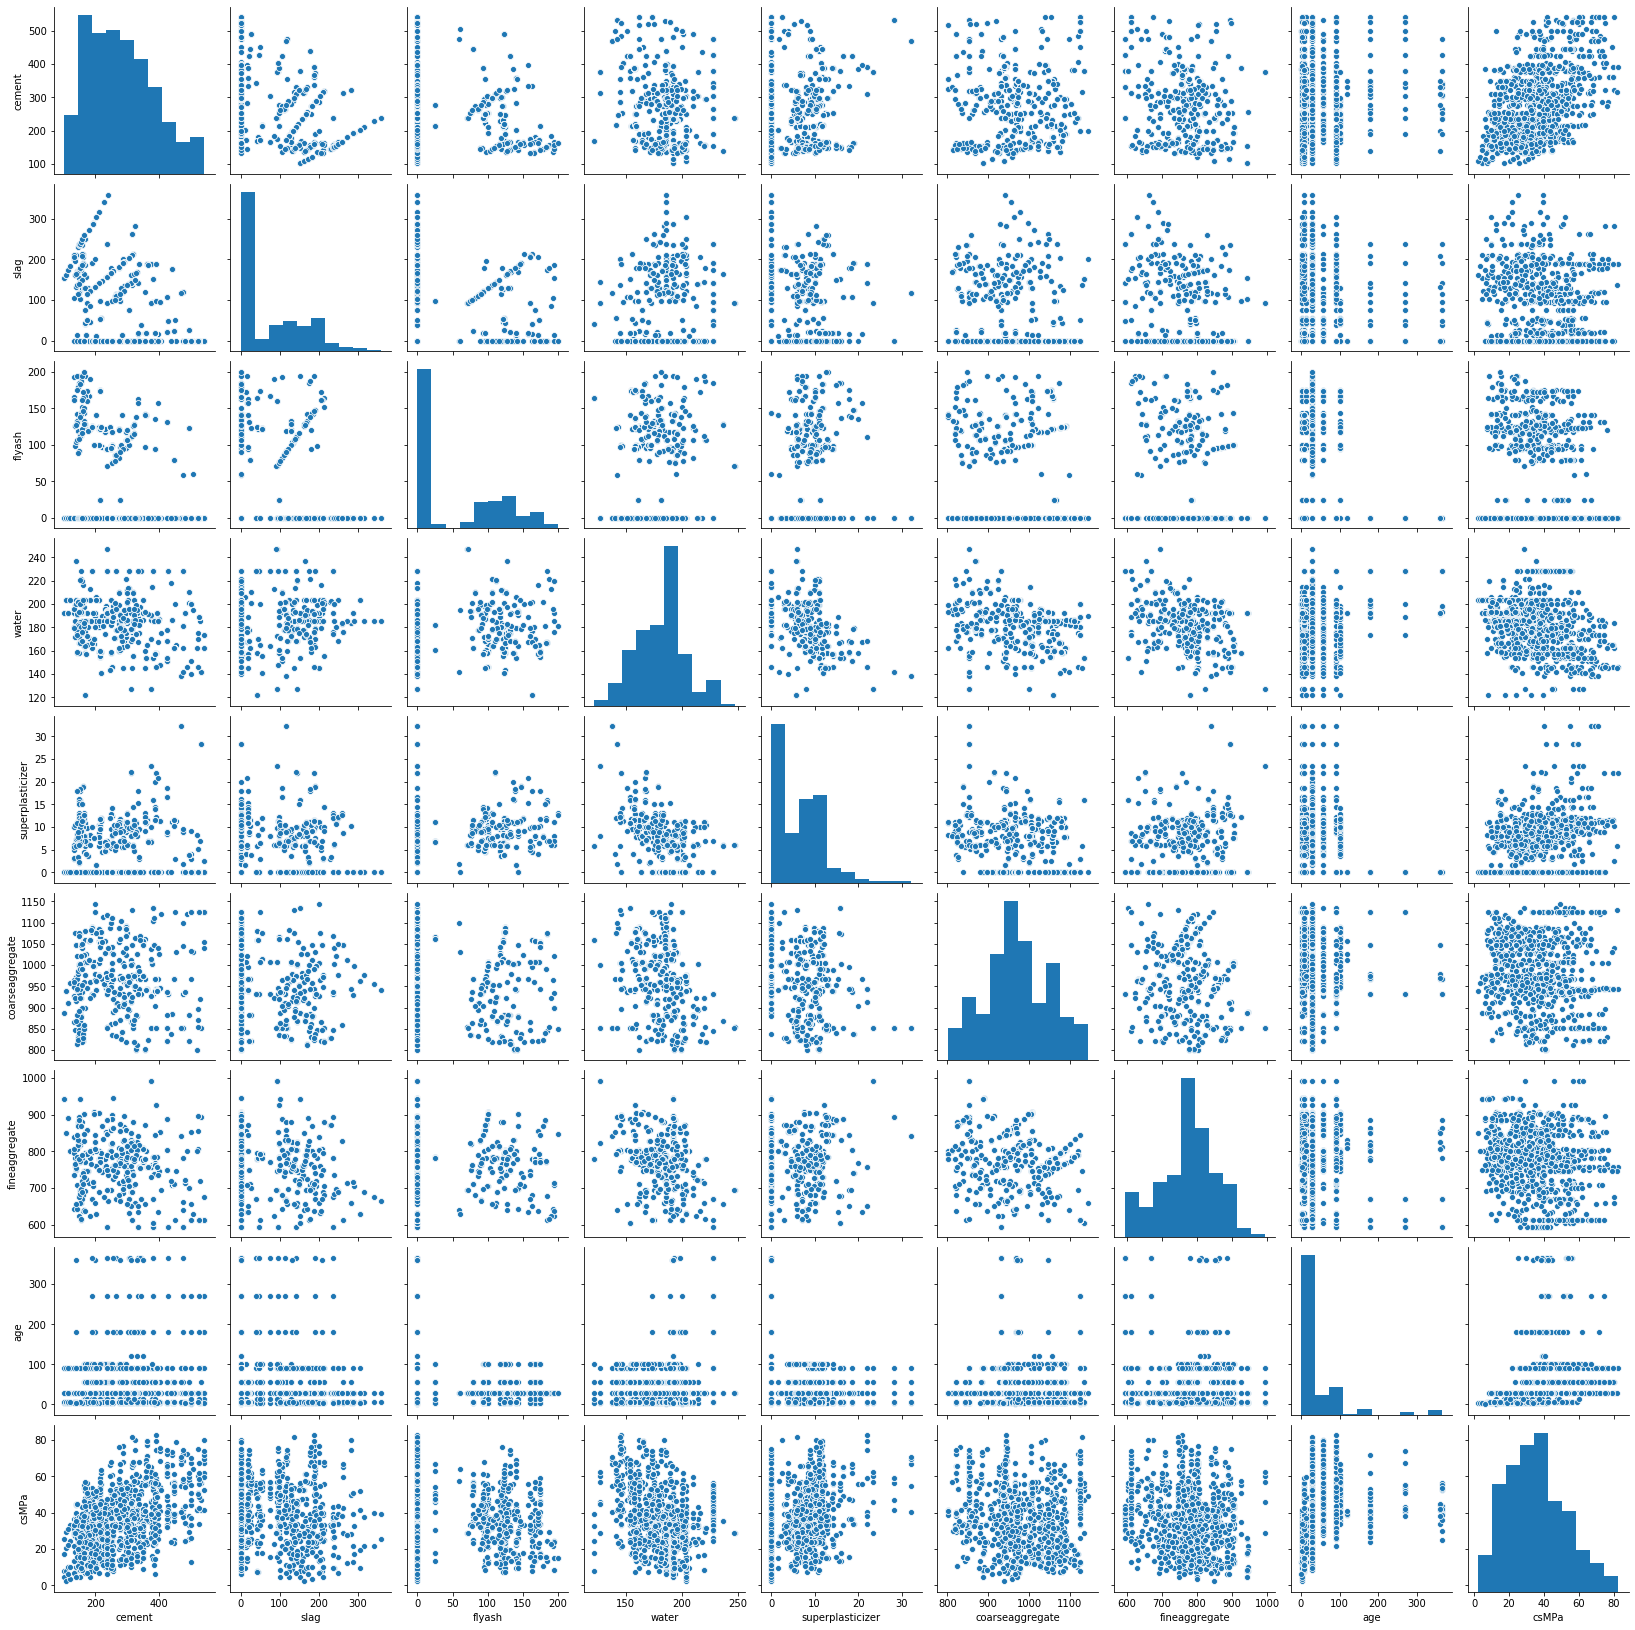

In [14]:
sns.pairplot(df);

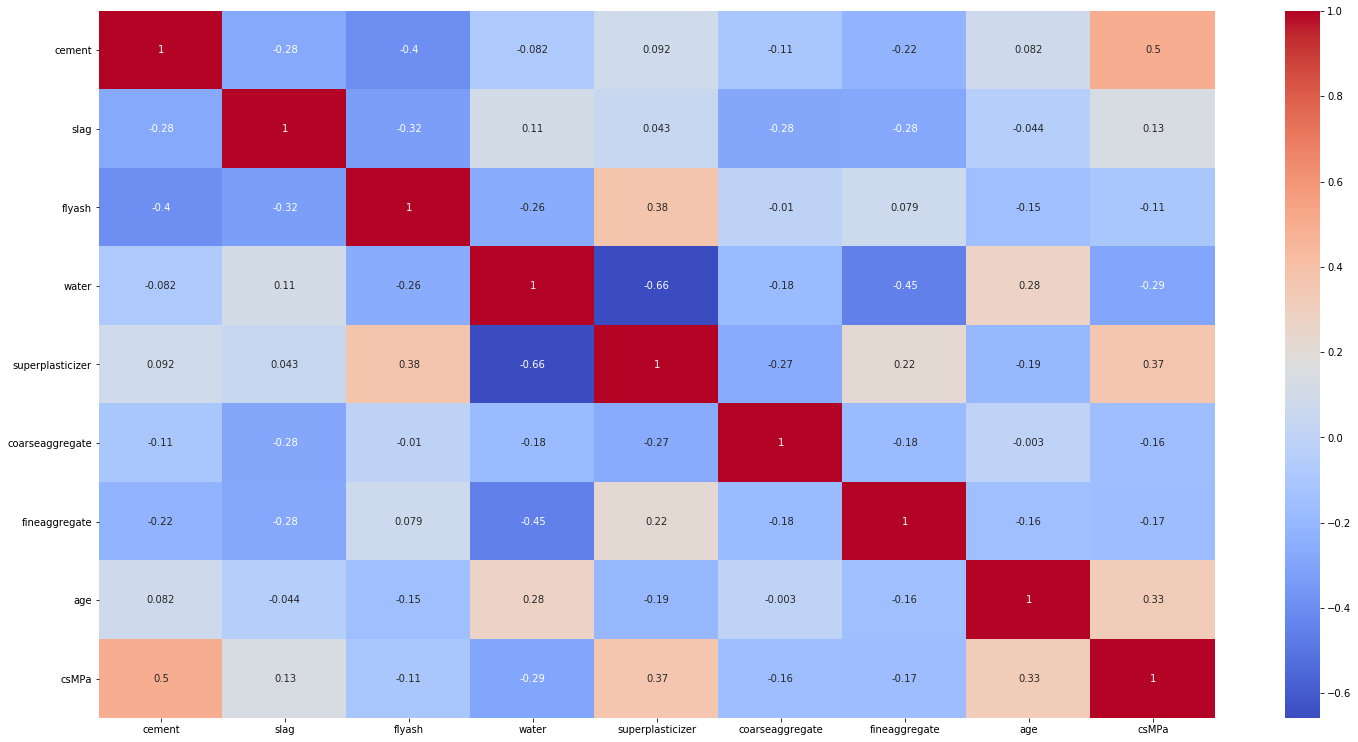

In [15]:
plt.figure(figsize=(25, 13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

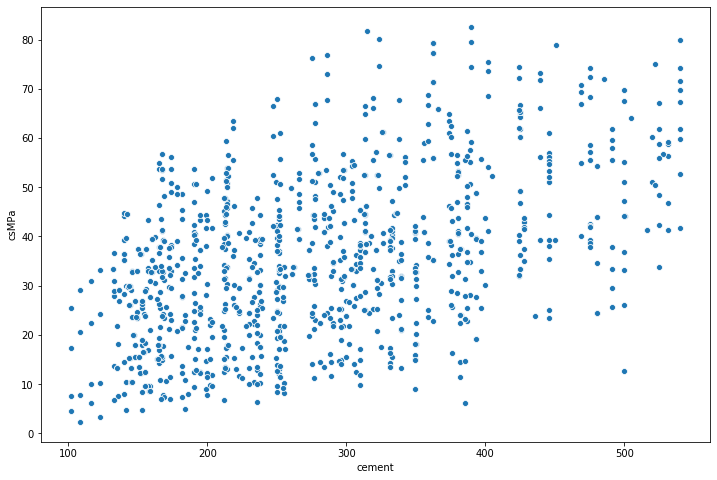

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='cement',y='csMPa',data=df);

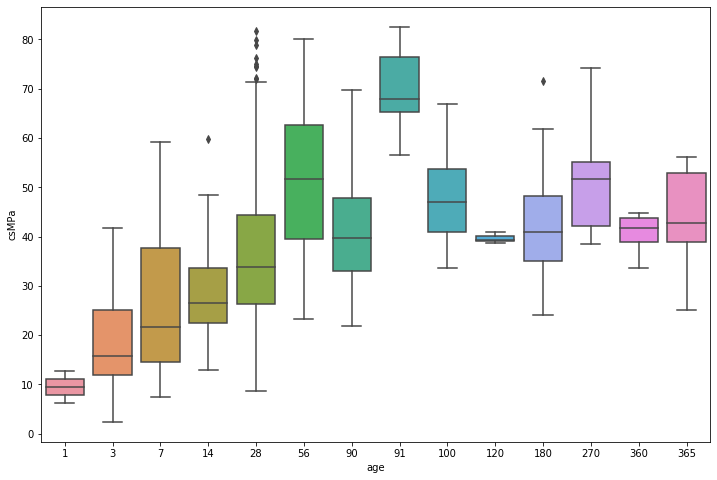

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='age', y='csMPa', data=df);

**Train - Test - Split**

In [21]:
X = df.drop('csMPa', axis =1).values
y = df.csMPa.values

In [22]:
y

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

In [23]:
X.shape

(1030, 8)

In [24]:
y.shape

(1030,)

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train) 

In [31]:
X_test = scaler.transform(X_test)

In [32]:
X_train.shape

(824, 8)

**Generating the Model**

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [63]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [64]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Epoch 1/400
7/7 [==============================] - 1s 23ms/step - loss: 1583.3100 - val_loss: 1530.9131
Epoch 2/400
7/7 [==============================] - 0s 7ms/step - loss: 1559.2786 - val_loss: 1527.9230
Epoch 3/400
7/7 [==============================] - 0s 7ms/step - loss: 1542.3692 - val_loss: 1525.6718
Epoch 4/400
7/7 [==============================] - 0s 7ms/step - loss: 1562.7055 - val_loss: 1523.2877
Epoch 5/400
7/7 [==============================] - 0s 23ms/step - loss: 1543.1743 - val_loss: 1520.5577
Epoch 6/400
7/7 [==============================] - 0s 11ms/step - loss: 1602.1820 - val_loss: 1517.0695
Epoch 7/400
7/7 [==============================] - 0s 11ms/step - loss: 1634.9111 - val_loss: 1512.5043
Epoch 8/400
7/7 [==============================] - 0s 11ms/step - loss: 1587.0066 - val_loss: 1505.5125
Epoch 9/400
7/7 [==============================] - 0s 8ms/step - loss: 1597.2054 - val_loss: 1493.5956
Epoch 10/400
7/7 [==============================] - 0s 8ms/step - lo

7/7 [==============================] - 0s 7ms/step - loss: 105.8082 - val_loss: 87.5267
Epoch 82/400
7/7 [==============================] - 0s 7ms/step - loss: 100.4033 - val_loss: 86.6456
Epoch 83/400
7/7 [==============================] - 0s 7ms/step - loss: 94.0286 - val_loss: 86.2216
Epoch 84/400
7/7 [==============================] - 0s 7ms/step - loss: 94.5872 - val_loss: 85.6528
Epoch 85/400
7/7 [==============================] - 0s 7ms/step - loss: 97.9905 - val_loss: 84.6864
Epoch 86/400
7/7 [==============================] - 0s 7ms/step - loss: 100.9837 - val_loss: 84.3053
Epoch 87/400
7/7 [==============================] - 0s 7ms/step - loss: 94.7277 - val_loss: 83.4390
Epoch 88/400
7/7 [==============================] - 0s 7ms/step - loss: 95.0490 - val_loss: 82.4979
Epoch 89/400
7/7 [==============================] - 0s 7ms/step - loss: 90.4143 - val_loss: 82.1003
Epoch 90/400
7/7 [==============================] - 0s 7ms/step - loss: 88.3892 - val_loss: 81.8217
Epoch 91/4

7/7 [==============================] - 0s 8ms/step - loss: 60.0463 - val_loss: 54.9242
Epoch 163/400
7/7 [==============================] - 0s 7ms/step - loss: 56.1708 - val_loss: 55.3917
Epoch 164/400
7/7 [==============================] - 0s 7ms/step - loss: 58.9555 - val_loss: 55.2587
Epoch 165/400
7/7 [==============================] - 0s 7ms/step - loss: 61.2626 - val_loss: 54.6948
Epoch 166/400
7/7 [==============================] - 0s 7ms/step - loss: 55.6677 - val_loss: 54.5446
Epoch 167/400
7/7 [==============================] - 0s 7ms/step - loss: 57.2108 - val_loss: 54.2819
Epoch 168/400
7/7 [==============================] - 0s 8ms/step - loss: 58.3997 - val_loss: 55.2799
Epoch 169/400
7/7 [==============================] - 0s 7ms/step - loss: 58.2695 - val_loss: 53.6936
Epoch 170/400
7/7 [==============================] - 0s 7ms/step - loss: 58.0833 - val_loss: 54.2944
Epoch 171/400
7/7 [==============================] - 0s 7ms/step - loss: 54.7892 - val_loss: 53.8091
Epoc

7/7 [==============================] - 0s 7ms/step - loss: 46.4071 - val_loss: 45.5364
Epoch 244/400
7/7 [==============================] - 0s 7ms/step - loss: 46.5930 - val_loss: 45.4627
Epoch 245/400
7/7 [==============================] - 0s 7ms/step - loss: 45.9932 - val_loss: 45.4065
Epoch 246/400
7/7 [==============================] - 0s 7ms/step - loss: 44.0565 - val_loss: 45.5036
Epoch 247/400
7/7 [==============================] - 0s 7ms/step - loss: 47.5280 - val_loss: 46.2594
Epoch 248/400
7/7 [==============================] - 0s 7ms/step - loss: 44.0819 - val_loss: 45.0291
Epoch 249/400
7/7 [==============================] - 0s 7ms/step - loss: 44.9728 - val_loss: 46.1225
Epoch 250/400
7/7 [==============================] - 0s 7ms/step - loss: 47.2458 - val_loss: 44.7977
Epoch 251/400
7/7 [==============================] - 0s 7ms/step - loss: 48.0591 - val_loss: 46.4404
Epoch 252/400
7/7 [==============================] - 0s 7ms/step - loss: 48.7855 - val_loss: 44.5350
Epoc

7/7 [==============================] - 0s 7ms/step - loss: 41.5819 - val_loss: 41.3361
Epoch 325/400
7/7 [==============================] - 0s 7ms/step - loss: 38.4904 - val_loss: 41.4877
Epoch 326/400
7/7 [==============================] - 0s 7ms/step - loss: 38.9607 - val_loss: 42.1789
Epoch 327/400
7/7 [==============================] - 0s 7ms/step - loss: 42.7033 - val_loss: 42.0759
Epoch 328/400
7/7 [==============================] - 0s 7ms/step - loss: 39.9211 - val_loss: 41.8618
Epoch 329/400
7/7 [==============================] - 0s 7ms/step - loss: 38.8765 - val_loss: 43.7112
Epoch 330/400
7/7 [==============================] - 0s 7ms/step - loss: 40.2710 - val_loss: 41.2796
Epoch 331/400
7/7 [==============================] - 0s 7ms/step - loss: 39.9021 - val_loss: 43.6417
Epoch 332/400
7/7 [==============================] - 0s 7ms/step - loss: 39.8583 - val_loss: 41.0261
Epoch 333/400
7/7 [==============================] - 0s 7ms/step - loss: 39.0837 - val_loss: 43.4848
Epoc

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 19)                171       
_________________________________________________________________
dense_11 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_12 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_13 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 20        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [66]:
losses = pd.DataFrame(model.history.history)

In [67]:
losses

,loss,val_loss
0,1575.782959,1530.913086
1,1570.462524,1527.922974
2,1567.800659,1525.671753
3,1565.439209,1523.287720
4,1562.821289,1520.557739
...,...,...
395,36.662521,40.772755
396,36.268166,40.676018
397,36.379650,40.502602
398,36.221684,40.412399


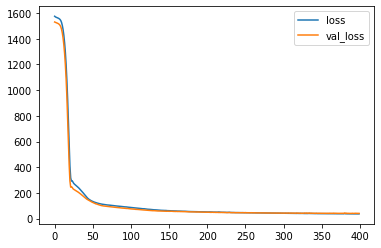

In [68]:
losses.plot();

(0, 200)

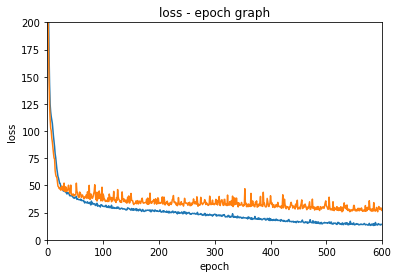

In [230]:
fig, ax= plt.subplots()
ax.plot(losses)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,600]) # focusing on the given x values
ax.set_ylim([0,200]) # focusing on the given y values

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
import numpy as np

In [71]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [72]:
y_pred = model.predict(X_test)

In [73]:
eval_metrics(y_test, y_pred)

r2_score: 0.8423933487349349 
 mae: 4.930698047378689 
 mse: 40.611592428977936 
 rmse: 6.372722528792379


In [75]:
explained_variance_score(y_test, y_pred)

0.8444736308673708

In [77]:
y_test.shape

(206,)

In [78]:
y_pred.shape

(206, 1)

In [79]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(206,)}
compare=pd.DataFrame(my_dict)

In [80]:
compare.sample(5)

,Actual,Pred
180,33.05,35.782234
86,44.61,33.270691
174,36.35,33.902672
23,6.90,12.018110
43,50.24,49.947773


In [81]:
model.evaluate(X_train, y_train, verbose=0)

36.06572723388672

In [82]:
model.evaluate(X_test, y_test, verbose=0)

40.61158752441406

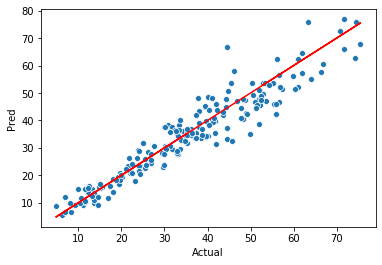

In [166]:
sns.scatterplot(x="Actual", y="Pred", data=compare)
plt.plot(y_test,y_test,'r');

In [115]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [116]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 128, epochs = 600)

Epoch 1/600
7/7 [==============================] - 1s 24ms/step - loss: 1570.4505 - val_loss: 1507.7208
Epoch 2/600
7/7 [==============================] - 0s 8ms/step - loss: 1574.5914 - val_loss: 1488.1281
Epoch 3/600
7/7 [==============================] - 0s 8ms/step - loss: 1490.9330 - val_loss: 1466.7899
Epoch 4/600
7/7 [==============================] - 0s 8ms/step - loss: 1550.8142 - val_loss: 1441.9420
Epoch 5/600
7/7 [==============================] - 0s 8ms/step - loss: 1475.0172 - val_loss: 1411.7004
Epoch 6/600
7/7 [==============================] - 0s 8ms/step - loss: 1455.9342 - val_loss: 1375.4714
Epoch 7/600
7/7 [==============================] - 0s 8ms/step - loss: 1408.7338 - val_loss: 1332.6093
Epoch 8/600
7/7 [==============================] - 0s 8ms/step - loss: 1340.5084 - val_loss: 1282.1088
Epoch 9/600
7/7 [==============================] - 0s 7ms/step - loss: 1274.5957 - val_loss: 1222.1451
Epoch 10/600
7/7 [==============================] - 0s 7ms/step - loss: 

7/7 [==============================] - 0s 7ms/step - loss: 110.8908 - val_loss: 101.5863
Epoch 82/600
7/7 [==============================] - 0s 7ms/step - loss: 113.0164 - val_loss: 101.3442
Epoch 83/600
7/7 [==============================] - 0s 7ms/step - loss: 112.5161 - val_loss: 99.3096
Epoch 84/600
7/7 [==============================] - 0s 7ms/step - loss: 115.4819 - val_loss: 99.5847
Epoch 85/600
7/7 [==============================] - 0s 7ms/step - loss: 111.3269 - val_loss: 99.6198
Epoch 86/600
7/7 [==============================] - 0s 8ms/step - loss: 106.1884 - val_loss: 99.7048
Epoch 87/600
7/7 [==============================] - 0s 7ms/step - loss: 118.0246 - val_loss: 99.0762
Epoch 88/600
7/7 [==============================] - 0s 7ms/step - loss: 115.9865 - val_loss: 96.7788
Epoch 89/600
7/7 [==============================] - 0s 7ms/step - loss: 107.6481 - val_loss: 97.3318
Epoch 90/600
7/7 [==============================] - 0s 7ms/step - loss: 112.2189 - val_loss: 100.3312


Epoch 162/600
7/7 [==============================] - 0s 9ms/step - loss: 84.9185 - val_loss: 75.4246
Epoch 163/600
7/7 [==============================] - 0s 9ms/step - loss: 83.9193 - val_loss: 75.8459
Epoch 164/600
7/7 [==============================] - 0s 9ms/step - loss: 81.3024 - val_loss: 74.3975
Epoch 165/600
7/7 [==============================] - 0s 8ms/step - loss: 80.5294 - val_loss: 74.3319
Epoch 166/600
7/7 [==============================] - 0s 8ms/step - loss: 84.7719 - val_loss: 73.3798
Epoch 167/600
7/7 [==============================] - 0s 8ms/step - loss: 88.7590 - val_loss: 73.2820
Epoch 168/600
7/7 [==============================] - 0s 8ms/step - loss: 82.5883 - val_loss: 77.1970
Epoch 169/600
7/7 [==============================] - 0s 8ms/step - loss: 82.9646 - val_loss: 72.2550
Epoch 170/600
7/7 [==============================] - 0s 8ms/step - loss: 87.3672 - val_loss: 75.2968
Epoch 171/600
7/7 [==============================] - 0s 8ms/step - loss: 79.4416 - val_loss

7/7 [==============================] - 0s 8ms/step - loss: 47.2676 - val_loss: 47.6840
Epoch 244/600
7/7 [==============================] - 0s 8ms/step - loss: 47.7161 - val_loss: 47.6132
Epoch 245/600
7/7 [==============================] - 0s 24ms/step - loss: 49.7108 - val_loss: 47.5251
Epoch 246/600
7/7 [==============================] - 0s 8ms/step - loss: 53.8196 - val_loss: 60.4614
Epoch 247/600
7/7 [==============================] - 0s 7ms/step - loss: 52.0228 - val_loss: 47.8242
Epoch 248/600
7/7 [==============================] - 0s 7ms/step - loss: 48.1811 - val_loss: 50.9811
Epoch 249/600
7/7 [==============================] - 0s 7ms/step - loss: 51.0964 - val_loss: 53.4134
Epoch 250/600
7/7 [==============================] - 0s 7ms/step - loss: 48.4054 - val_loss: 47.3870
Epoch 251/600
7/7 [==============================] - 0s 7ms/step - loss: 46.1275 - val_loss: 51.8405
Epoch 252/600
7/7 [==============================] - 0s 7ms/step - loss: 46.6906 - val_loss: 53.0653
Epo

7/7 [==============================] - 0s 7ms/step - loss: 39.9730 - val_loss: 46.1559
Epoch 325/600
7/7 [==============================] - 0s 7ms/step - loss: 38.9675 - val_loss: 47.7781
Epoch 326/600
7/7 [==============================] - 0s 7ms/step - loss: 40.4811 - val_loss: 51.0817
Epoch 327/600
7/7 [==============================] - 0s 7ms/step - loss: 44.3447 - val_loss: 43.3203
Epoch 328/600
7/7 [==============================] - 0s 7ms/step - loss: 42.0700 - val_loss: 48.0121
Epoch 329/600
7/7 [==============================] - 0s 7ms/step - loss: 38.6323 - val_loss: 47.2576
Epoch 330/600
7/7 [==============================] - 0s 7ms/step - loss: 44.5552 - val_loss: 53.7255
Epoch 331/600
7/7 [==============================] - 0s 7ms/step - loss: 43.2384 - val_loss: 42.9246
Epoch 332/600
7/7 [==============================] - 0s 7ms/step - loss: 42.5031 - val_loss: 42.7903
Epoch 333/600
7/7 [==============================] - 0s 7ms/step - loss: 38.8941 - val_loss: 48.4553
Epoc

7/7 [==============================] - 0s 7ms/step - loss: 38.7758 - val_loss: 45.4154
Epoch 406/600
7/7 [==============================] - 0s 7ms/step - loss: 37.5177 - val_loss: 51.0091
Epoch 407/600
7/7 [==============================] - 0s 8ms/step - loss: 40.2197 - val_loss: 47.8891
Epoch 408/600
7/7 [==============================] - 0s 9ms/step - loss: 38.7542 - val_loss: 48.2854
Epoch 409/600
7/7 [==============================] - 0s 8ms/step - loss: 38.9820 - val_loss: 41.9412
Epoch 410/600
7/7 [==============================] - 0s 8ms/step - loss: 36.8144 - val_loss: 45.6271
Epoch 411/600
7/7 [==============================] - 0s 7ms/step - loss: 38.1555 - val_loss: 46.5558
Epoch 412/600
7/7 [==============================] - 0s 8ms/step - loss: 38.4176 - val_loss: 41.4220
Epoch 413/600
7/7 [==============================] - 0s 8ms/step - loss: 42.3345 - val_loss: 45.5882
Epoch 414/600
7/7 [==============================] - 0s 9ms/step - loss: 40.5484 - val_loss: 41.5731
Epoc

7/7 [==============================] - 0s 8ms/step - loss: 38.8174 - val_loss: 44.6101
Epoch 487/600
7/7 [==============================] - 0s 7ms/step - loss: 38.6528 - val_loss: 44.3324
Epoch 488/600
7/7 [==============================] - 0s 7ms/step - loss: 41.7682 - val_loss: 44.2200
Epoch 489/600
7/7 [==============================] - 0s 8ms/step - loss: 40.3739 - val_loss: 43.3605
Epoch 490/600
7/7 [==============================] - 0s 8ms/step - loss: 34.8624 - val_loss: 41.8038
Epoch 491/600
7/7 [==============================] - 0s 9ms/step - loss: 37.3081 - val_loss: 56.2150
Epoch 492/600
7/7 [==============================] - 0s 9ms/step - loss: 44.7229 - val_loss: 49.5107
Epoch 493/600
7/7 [==============================] - 0s 9ms/step - loss: 37.8257 - val_loss: 43.4486
Epoch 494/600
7/7 [==============================] - 0s 9ms/step - loss: 35.2972 - val_loss: 46.8966
Epoch 495/600
7/7 [==============================] - 0s 9ms/step - loss: 41.2079 - val_loss: 43.3231
Epoc

7/7 [==============================] - 0s 8ms/step - loss: 37.7460 - val_loss: 51.9996
Epoch 568/600
7/7 [==============================] - 0s 8ms/step - loss: 40.0707 - val_loss: 41.4457
Epoch 569/600
7/7 [==============================] - 0s 8ms/step - loss: 36.0891 - val_loss: 45.7649
Epoch 570/600
7/7 [==============================] - 0s 8ms/step - loss: 37.0596 - val_loss: 41.7984
Epoch 571/600
7/7 [==============================] - 0s 9ms/step - loss: 37.2462 - val_loss: 52.7261
Epoch 572/600
7/7 [==============================] - 0s 9ms/step - loss: 38.0858 - val_loss: 46.0265
Epoch 573/600
7/7 [==============================] - 0s 9ms/step - loss: 37.2992 - val_loss: 41.3928
Epoch 574/600
7/7 [==============================] - 0s 10ms/step - loss: 36.4418 - val_loss: 47.1602
Epoch 575/600
7/7 [==============================] - 0s 10ms/step - loss: 36.2190 - val_loss: 55.4521
Epoch 576/600
7/7 [==============================] - 0s 9ms/step - loss: 39.1756 - val_loss: 41.5888
Ep

In [117]:
losses = pd.DataFrame(model.history.history)

In [118]:
losses

,loss,val_loss
0,1561.200684,1507.720825
1,1540.925415,1488.128052
2,1520.829224,1466.789917
3,1498.559937,1441.942017
4,1471.609253,1411.700439
...,...,...
595,37.332554,41.672630
596,36.429810,41.132885
597,37.816120,41.340858
598,37.894390,41.243923


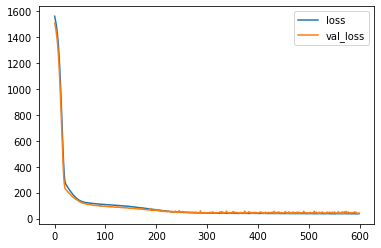

In [119]:
losses.plot();

(0, 200)

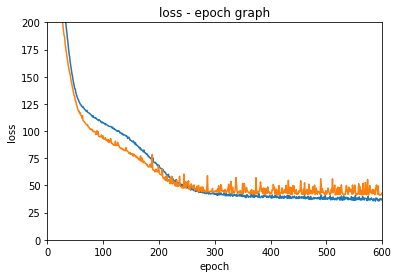

In [120]:
fig, ax= plt.subplots()
ax.plot(losses)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,600]) # focusing on the given x values
ax.set_ylim([0,200]) # focusing on the given y values

In [121]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [122]:
y_pred = model.predict(X_test)

In [123]:
eval_metrics(y_test, y_pred)

r2_score: 0.8338363300934305 
 mae: 5.053340079020528 
 mse: 42.81653841752945 
 rmse: 6.543434756878795


In [124]:
explained_variance_score(y_test, y_pred)

0.8368430969516287

In [125]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(206,)}
compare=pd.DataFrame(my_dict)

In [126]:
compare.sample(5)

,Actual,Pred
150,48.28,40.957870
68,27.66,33.706909
67,12.18,16.966036
179,36.45,37.441711
110,44.70,45.461563


In [127]:
model.evaluate(X_train, y_train, verbose=0)

35.58962631225586

In [128]:
model.evaluate(X_test, y_test, verbose=0)

42.81653594970703

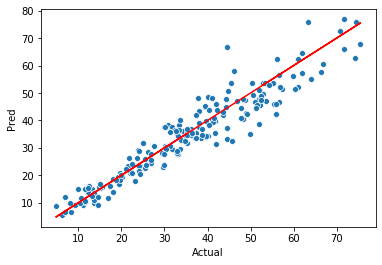

In [165]:
sns.scatterplot(x="Actual", y="Pred", data=compare)
plt.plot(y_test,y_test,'r');

In [149]:
model = Sequential()

model.add(Dense(22, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [150]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 32, epochs = 600)

Epoch 1/600
26/26 [==============================] - 1s 7ms/step - loss: 1617.9305 - val_loss: 1480.1113
Epoch 2/600
26/26 [==============================] - 0s 3ms/step - loss: 1460.8205 - val_loss: 1286.3586
Epoch 3/600
26/26 [==============================] - 0s 2ms/step - loss: 1226.3461 - val_loss: 696.6813
Epoch 4/600
26/26 [==============================] - 0s 2ms/step - loss: 576.0881 - val_loss: 219.6912
Epoch 5/600
26/26 [==============================] - 0s 2ms/step - loss: 255.5619 - val_loss: 195.8797
Epoch 6/600
26/26 [==============================] - 0s 3ms/step - loss: 224.8633 - val_loss: 178.9630
Epoch 7/600
26/26 [==============================] - 0s 3ms/step - loss: 197.1117 - val_loss: 164.1236
Epoch 8/600
26/26 [==============================] - 0s 3ms/step - loss: 188.7870 - val_loss: 150.9141
Epoch 9/600
26/26 [==============================] - 0s 3ms/step - loss: 171.2446 - val_loss: 135.8306
Epoch 10/600
26/26 [==============================] - 0s 2ms/step - 

Epoch 81/600
26/26 [==============================] - 0s 3ms/step - loss: 48.6096 - val_loss: 49.2003
Epoch 82/600
26/26 [==============================] - 0s 3ms/step - loss: 55.6924 - val_loss: 43.9647
Epoch 83/600
26/26 [==============================] - 0s 2ms/step - loss: 48.3750 - val_loss: 44.6458
Epoch 84/600
26/26 [==============================] - 0s 2ms/step - loss: 43.8194 - val_loss: 43.3411
Epoch 85/600
26/26 [==============================] - 0s 2ms/step - loss: 43.9884 - val_loss: 45.6397
Epoch 86/600
26/26 [==============================] - 0s 3ms/step - loss: 44.3698 - val_loss: 44.0124
Epoch 87/600
26/26 [==============================] - 0s 2ms/step - loss: 46.7558 - val_loss: 43.0087
Epoch 88/600
26/26 [==============================] - 0s 2ms/step - loss: 48.5302 - val_loss: 45.9963
Epoch 89/600
26/26 [==============================] - 0s 3ms/step - loss: 47.9157 - val_loss: 43.5274
Epoch 90/600
26/26 [==============================] - 0s 3ms/step - loss: 47.6459 

26/26 [==============================] - 0s 3ms/step - loss: 38.4918 - val_loss: 37.2132
Epoch 161/600
26/26 [==============================] - 0s 3ms/step - loss: 37.9647 - val_loss: 36.8266
Epoch 162/600
26/26 [==============================] - 0s 2ms/step - loss: 33.3079 - val_loss: 37.0010
Epoch 163/600
26/26 [==============================] - 0s 2ms/step - loss: 31.9579 - val_loss: 38.4431
Epoch 164/600
26/26 [==============================] - 0s 2ms/step - loss: 32.6426 - val_loss: 36.6063
Epoch 165/600
26/26 [==============================] - 0s 2ms/step - loss: 32.6800 - val_loss: 37.0498
Epoch 166/600
26/26 [==============================] - 0s 7ms/step - loss: 32.6008 - val_loss: 36.1671
Epoch 167/600
26/26 [==============================] - 0s 3ms/step - loss: 36.8620 - val_loss: 36.1812
Epoch 168/600
26/26 [==============================] - 0s 2ms/step - loss: 31.4186 - val_loss: 35.3656
Epoch 169/600
26/26 [==============================] - 0s 2ms/step - loss: 31.2013 - va

26/26 [==============================] - 0s 3ms/step - loss: 26.5720 - val_loss: 31.3683
Epoch 240/600
26/26 [==============================] - 0s 3ms/step - loss: 26.5409 - val_loss: 31.9013
Epoch 241/600
26/26 [==============================] - 0s 3ms/step - loss: 24.9694 - val_loss: 33.8656
Epoch 242/600
26/26 [==============================] - 0s 2ms/step - loss: 23.2712 - val_loss: 32.1989
Epoch 243/600
26/26 [==============================] - 0s 2ms/step - loss: 24.2500 - val_loss: 31.2671
Epoch 244/600
26/26 [==============================] - 0s 3ms/step - loss: 26.9236 - val_loss: 36.6495
Epoch 245/600
26/26 [==============================] - 0s 3ms/step - loss: 24.7282 - val_loss: 31.2307
Epoch 246/600
26/26 [==============================] - 0s 3ms/step - loss: 25.0734 - val_loss: 30.7027
Epoch 247/600
26/26 [==============================] - 0s 2ms/step - loss: 26.1796 - val_loss: 31.3968
Epoch 248/600
26/26 [==============================] - 0s 3ms/step - loss: 25.7946 - va

26/26 [==============================] - 0s 3ms/step - loss: 23.8133 - val_loss: 31.9785
Epoch 319/600
26/26 [==============================] - 0s 3ms/step - loss: 21.2840 - val_loss: 32.5885
Epoch 320/600
26/26 [==============================] - 0s 2ms/step - loss: 22.9094 - val_loss: 30.3321
Epoch 321/600
26/26 [==============================] - 0s 3ms/step - loss: 22.3152 - val_loss: 29.9951
Epoch 322/600
26/26 [==============================] - 0s 3ms/step - loss: 20.7761 - val_loss: 29.7080
Epoch 323/600
26/26 [==============================] - 0s 2ms/step - loss: 23.3225 - val_loss: 32.5425
Epoch 324/600
26/26 [==============================] - 0s 2ms/step - loss: 24.6011 - val_loss: 32.1884
Epoch 325/600
26/26 [==============================] - 0s 2ms/step - loss: 22.7244 - val_loss: 29.5364
Epoch 326/600
26/26 [==============================] - 0s 3ms/step - loss: 21.0744 - val_loss: 29.9885
Epoch 327/600
26/26 [==============================] - 0s 2ms/step - loss: 22.5388 - va

26/26 [==============================] - 0s 3ms/step - loss: 23.3987 - val_loss: 31.3548
Epoch 398/600
26/26 [==============================] - 0s 3ms/step - loss: 22.2866 - val_loss: 29.8581
Epoch 399/600
26/26 [==============================] - 0s 3ms/step - loss: 21.6061 - val_loss: 35.4710
Epoch 400/600
26/26 [==============================] - 0s 2ms/step - loss: 24.5471 - val_loss: 29.9707
Epoch 401/600
26/26 [==============================] - 0s 3ms/step - loss: 20.5431 - val_loss: 31.2123
Epoch 402/600
26/26 [==============================] - 0s 2ms/step - loss: 23.8190 - val_loss: 32.7676
Epoch 403/600
26/26 [==============================] - 0s 2ms/step - loss: 21.6316 - val_loss: 30.2203
Epoch 404/600
26/26 [==============================] - 0s 2ms/step - loss: 20.3575 - val_loss: 31.0283
Epoch 405/600
26/26 [==============================] - 0s 2ms/step - loss: 21.9719 - val_loss: 30.3352
Epoch 406/600
26/26 [==============================] - 0s 2ms/step - loss: 21.8981 - va

26/26 [==============================] - 0s 3ms/step - loss: 22.9897 - val_loss: 36.3645
Epoch 477/600
26/26 [==============================] - 0s 3ms/step - loss: 19.8273 - val_loss: 29.0678
Epoch 478/600
26/26 [==============================] - 0s 3ms/step - loss: 18.4997 - val_loss: 31.8068
Epoch 479/600
26/26 [==============================] - 0s 3ms/step - loss: 20.9762 - val_loss: 32.5579
Epoch 480/600
26/26 [==============================] - 0s 3ms/step - loss: 20.2928 - val_loss: 30.0989
Epoch 481/600
26/26 [==============================] - 0s 3ms/step - loss: 19.8609 - val_loss: 31.1837
Epoch 482/600
26/26 [==============================] - 0s 3ms/step - loss: 19.0496 - val_loss: 30.7025
Epoch 483/600
26/26 [==============================] - 0s 3ms/step - loss: 17.3486 - val_loss: 31.5244
Epoch 484/600
26/26 [==============================] - 0s 3ms/step - loss: 22.4717 - val_loss: 30.0702
Epoch 485/600
26/26 [==============================] - 0s 3ms/step - loss: 21.6683 - va

26/26 [==============================] - 0s 3ms/step - loss: 19.1273 - val_loss: 29.2889
Epoch 556/600
26/26 [==============================] - 0s 3ms/step - loss: 19.9828 - val_loss: 30.1077
Epoch 557/600
26/26 [==============================] - 0s 3ms/step - loss: 17.7059 - val_loss: 28.8662
Epoch 558/600
26/26 [==============================] - 0s 3ms/step - loss: 17.8344 - val_loss: 28.8910
Epoch 559/600
26/26 [==============================] - 0s 3ms/step - loss: 19.6997 - val_loss: 29.4389
Epoch 560/600
26/26 [==============================] - 0s 3ms/step - loss: 19.7472 - val_loss: 31.0116
Epoch 561/600
26/26 [==============================] - 0s 2ms/step - loss: 18.8895 - val_loss: 30.5991
Epoch 562/600
26/26 [==============================] - 0s 2ms/step - loss: 19.4261 - val_loss: 30.8833
Epoch 563/600
26/26 [==============================] - 0s 3ms/step - loss: 19.6088 - val_loss: 31.9469
Epoch 564/600
26/26 [==============================] - 0s 3ms/step - loss: 20.9101 - va

In [151]:
losses = pd.DataFrame(model.history.history)

In [152]:
losses

,loss,val_loss
0,1552.832031,1480.111328
1,1446.979614,1286.358643
2,1097.491089,696.681274
3,426.138550,219.691177
4,249.021408,195.879700
...,...,...
595,19.408344,29.036921
596,18.919868,31.120558
597,18.501926,28.391815
598,18.306942,30.223837


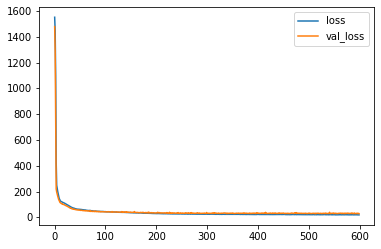

In [153]:
losses.plot();

(0, 200)

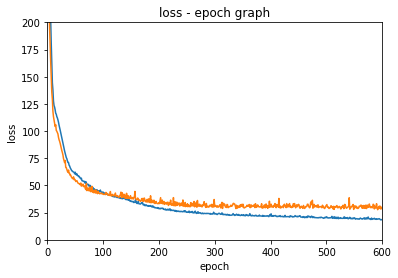

In [154]:
fig, ax= plt.subplots()
ax.plot(losses)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,600]) # focusing on the given x values
ax.set_ylim([0,200]) # focusing on the given y values

In [156]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [157]:
y_pred = model.predict(X_test)

In [158]:
eval_metrics(y_test, y_pred)

r2_score: 0.8884410191778757 
 mae: 3.917554241661887 
 mse: 28.746171716577322 
 rmse: 5.361545646227151


In [159]:
explained_variance_score(y_test, y_pred)

0.8906829462652102

In [160]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(206,)}
compare=pd.DataFrame(my_dict)

In [161]:
model.evaluate(X_train, y_train, verbose=0)

17.95530891418457

In [162]:
model.evaluate(X_test, y_test, verbose=0)

28.746171951293945

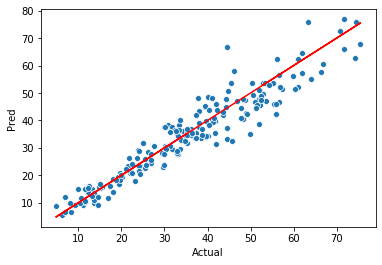

In [164]:
sns.scatterplot(x="Actual", y="Pred", data=compare)
plt.plot(y_test,y_test,'r');

In [177]:
model = Sequential()

model.add(Dense(22, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(1))
opt = Adam(lr=0.01)
model.compile(optimizer = opt, loss = 'mse')

In [178]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 32, epochs = 600)

Epoch 1/600
26/26 [==============================] - 1s 7ms/step - loss: 1342.2720 - val_loss: 198.2066
Epoch 2/600
26/26 [==============================] - 0s 3ms/step - loss: 260.2354 - val_loss: 167.7597
Epoch 3/600
26/26 [==============================] - 0s 3ms/step - loss: 164.8206 - val_loss: 131.0255
Epoch 4/600
26/26 [==============================] - 0s 2ms/step - loss: 129.2056 - val_loss: 113.2737
Epoch 5/600
26/26 [==============================] - 0s 2ms/step - loss: 121.2456 - val_loss: 114.1586
Epoch 6/600
26/26 [==============================] - 0s 2ms/step - loss: 115.2838 - val_loss: 106.8079
Epoch 7/600
26/26 [==============================] - 0s 2ms/step - loss: 124.1151 - val_loss: 124.4345
Epoch 8/600
26/26 [==============================] - 0s 3ms/step - loss: 123.2514 - val_loss: 103.4168
Epoch 9/600
26/26 [==============================] - 0s 3ms/step - loss: 126.6352 - val_loss: 97.6502
Epoch 10/600
26/26 [==============================] - 0s 2ms/step - loss:

26/26 [==============================] - 0s 2ms/step - loss: 38.0657 - val_loss: 39.0118
Epoch 82/600
26/26 [==============================] - 0s 2ms/step - loss: 42.7572 - val_loss: 77.1776
Epoch 83/600
26/26 [==============================] - 0s 2ms/step - loss: 50.0989 - val_loss: 47.3390
Epoch 84/600
26/26 [==============================] - 0s 2ms/step - loss: 41.1859 - val_loss: 42.8082
Epoch 85/600
26/26 [==============================] - 0s 2ms/step - loss: 39.9614 - val_loss: 41.7270
Epoch 86/600
26/26 [==============================] - 0s 3ms/step - loss: 37.4035 - val_loss: 41.1250
Epoch 87/600
26/26 [==============================] - 0s 3ms/step - loss: 41.6624 - val_loss: 44.4058
Epoch 88/600
26/26 [==============================] - 0s 3ms/step - loss: 36.2796 - val_loss: 40.3055
Epoch 89/600
26/26 [==============================] - 0s 3ms/step - loss: 40.2189 - val_loss: 46.3714
Epoch 90/600
26/26 [==============================] - 0s 2ms/step - loss: 48.6749 - val_loss: 4

Epoch 161/600
26/26 [==============================] - 0s 2ms/step - loss: 30.4751 - val_loss: 40.6387
Epoch 162/600
26/26 [==============================] - 0s 2ms/step - loss: 32.8997 - val_loss: 51.6007
Epoch 163/600
26/26 [==============================] - 0s 2ms/step - loss: 29.3524 - val_loss: 51.8705
Epoch 164/600
26/26 [==============================] - 0s 2ms/step - loss: 29.9620 - val_loss: 62.6596
Epoch 165/600
26/26 [==============================] - 0s 2ms/step - loss: 36.0843 - val_loss: 56.5690
Epoch 166/600
26/26 [==============================] - 0s 2ms/step - loss: 37.3292 - val_loss: 48.2648
Epoch 167/600
26/26 [==============================] - 0s 2ms/step - loss: 34.0232 - val_loss: 42.2389
Epoch 168/600
26/26 [==============================] - 0s 3ms/step - loss: 29.9777 - val_loss: 59.7356
Epoch 169/600
26/26 [==============================] - 0s 2ms/step - loss: 31.7120 - val_loss: 45.7872
Epoch 170/600
26/26 [==============================] - 0s 2ms/step - loss

26/26 [==============================] - 0s 2ms/step - loss: 25.9912 - val_loss: 38.2998
Epoch 241/600
26/26 [==============================] - 0s 2ms/step - loss: 21.2467 - val_loss: 42.3072
Epoch 242/600
26/26 [==============================] - 0s 2ms/step - loss: 21.4894 - val_loss: 36.9129
Epoch 243/600
26/26 [==============================] - 0s 2ms/step - loss: 23.5990 - val_loss: 42.0236
Epoch 244/600
26/26 [==============================] - 0s 2ms/step - loss: 23.3134 - val_loss: 39.2874
Epoch 245/600
26/26 [==============================] - 0s 2ms/step - loss: 23.6305 - val_loss: 44.2768
Epoch 246/600
26/26 [==============================] - 0s 3ms/step - loss: 24.3345 - val_loss: 43.9022
Epoch 247/600
26/26 [==============================] - 0s 2ms/step - loss: 18.9112 - val_loss: 42.0789
Epoch 248/600
26/26 [==============================] - 0s 2ms/step - loss: 20.9304 - val_loss: 41.8042
Epoch 249/600
26/26 [==============================] - 0s 2ms/step - loss: 19.4316 - va

26/26 [==============================] - 0s 2ms/step - loss: 23.1265 - val_loss: 49.6790
Epoch 320/600
26/26 [==============================] - 0s 2ms/step - loss: 21.2780 - val_loss: 39.0708
Epoch 321/600
26/26 [==============================] - 0s 2ms/step - loss: 17.6859 - val_loss: 36.6295
Epoch 322/600
26/26 [==============================] - 0s 2ms/step - loss: 18.8975 - val_loss: 42.8755
Epoch 323/600
26/26 [==============================] - 0s 2ms/step - loss: 19.6297 - val_loss: 36.9536
Epoch 324/600
26/26 [==============================] - 0s 2ms/step - loss: 18.2870 - val_loss: 42.0451
Epoch 325/600
26/26 [==============================] - 0s 2ms/step - loss: 16.9696 - val_loss: 34.1021
Epoch 326/600
26/26 [==============================] - 0s 2ms/step - loss: 17.3122 - val_loss: 41.0584
Epoch 327/600
26/26 [==============================] - 0s 2ms/step - loss: 18.1088 - val_loss: 40.8537
Epoch 328/600
26/26 [==============================] - 0s 2ms/step - loss: 21.6235 - va

26/26 [==============================] - 0s 2ms/step - loss: 15.7050 - val_loss: 37.7350
Epoch 399/600
26/26 [==============================] - 0s 2ms/step - loss: 17.1677 - val_loss: 37.6010
Epoch 400/600
26/26 [==============================] - 0s 2ms/step - loss: 13.5268 - val_loss: 37.4191
Epoch 401/600
26/26 [==============================] - 0s 2ms/step - loss: 13.5894 - val_loss: 33.3356
Epoch 402/600
26/26 [==============================] - 0s 2ms/step - loss: 16.4492 - val_loss: 38.2171
Epoch 403/600
26/26 [==============================] - 0s 2ms/step - loss: 19.7410 - val_loss: 40.2208
Epoch 404/600
26/26 [==============================] - 0s 2ms/step - loss: 18.3463 - val_loss: 40.4613
Epoch 405/600
26/26 [==============================] - 0s 2ms/step - loss: 17.4905 - val_loss: 45.6338
Epoch 406/600
26/26 [==============================] - 0s 2ms/step - loss: 16.5995 - val_loss: 35.2613
Epoch 407/600
26/26 [==============================] - 0s 2ms/step - loss: 18.4261 - va

26/26 [==============================] - 0s 2ms/step - loss: 13.4860 - val_loss: 40.6877
Epoch 478/600
26/26 [==============================] - 0s 2ms/step - loss: 14.0833 - val_loss: 41.4427
Epoch 479/600
26/26 [==============================] - 0s 2ms/step - loss: 12.2217 - val_loss: 36.1881
Epoch 480/600
26/26 [==============================] - 0s 2ms/step - loss: 11.6939 - val_loss: 38.9277
Epoch 481/600
26/26 [==============================] - 0s 2ms/step - loss: 11.1248 - val_loss: 36.1134
Epoch 482/600
26/26 [==============================] - 0s 2ms/step - loss: 12.1986 - val_loss: 36.8135
Epoch 483/600
26/26 [==============================] - 0s 2ms/step - loss: 12.3512 - val_loss: 45.5236
Epoch 484/600
26/26 [==============================] - 0s 3ms/step - loss: 16.1846 - val_loss: 37.9518
Epoch 485/600
26/26 [==============================] - 0s 3ms/step - loss: 14.7318 - val_loss: 39.6459
Epoch 486/600
26/26 [==============================] - 0s 3ms/step - loss: 16.9659 - va

26/26 [==============================] - 0s 2ms/step - loss: 12.2930 - val_loss: 44.6701
Epoch 557/600
26/26 [==============================] - 0s 2ms/step - loss: 14.6516 - val_loss: 38.1959
Epoch 558/600
26/26 [==============================] - 0s 2ms/step - loss: 14.5010 - val_loss: 37.1212
Epoch 559/600
26/26 [==============================] - 0s 2ms/step - loss: 13.4775 - val_loss: 41.0143
Epoch 560/600
26/26 [==============================] - 0s 2ms/step - loss: 11.2186 - val_loss: 38.0846
Epoch 561/600
26/26 [==============================] - 0s 2ms/step - loss: 11.9842 - val_loss: 36.4944
Epoch 562/600
26/26 [==============================] - ETA: 0s - loss: 6.079 - 0s 2ms/step - loss: 13.6925 - val_loss: 41.9835
Epoch 563/600
26/26 [==============================] - 0s 2ms/step - loss: 12.5689 - val_loss: 37.7681
Epoch 564/600
26/26 [==============================] - 0s 2ms/step - loss: 13.3572 - val_loss: 39.5048
Epoch 565/600
26/26 [==============================] - 0s 2ms/s

In [179]:
losses = pd.DataFrame(model.history.history)

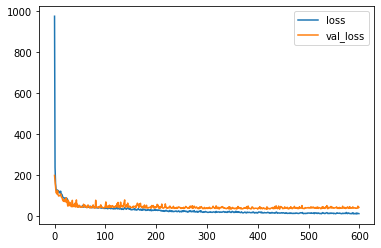

In [180]:
losses.plot();

(0, 200)

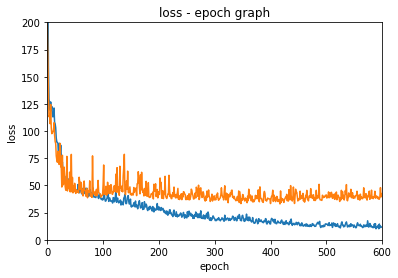

In [181]:
fig, ax= plt.subplots()
ax.plot(losses)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,600]) # focusing on the given x values
ax.set_ylim([0,200]) # focusing on the given y values

In [182]:
y_pred = model.predict(X_test)

In [183]:
eval_metrics(y_test, y_pred)

r2_score: 0.8353874360849765 
 mae: 4.420192780355805 
 mse: 42.41685424279964 
 rmse: 6.512822294735182


In [184]:
explained_variance_score(y_test, y_pred)

0.848368215778351

In [185]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(206,)}
compare=pd.DataFrame(my_dict)

In [186]:
model.evaluate(X_train, y_train, verbose=0)

10.705731391906738

In [187]:
model.evaluate(X_test, y_test, verbose=0)

42.41685104370117

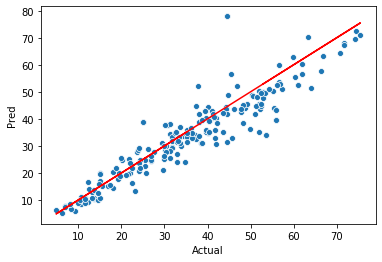

In [188]:
sns.scatterplot(x="Actual", y="Pred", data=compare)
plt.plot(y_test,y_test,'r');

**Early Stopping**

In [191]:
from tensorflow.keras.callbacks import EarlyStopping

In [208]:
model = Sequential()

model.add(Dense(22, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [209]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 15, restore_best_weights=True)

In [210]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 8, epochs = 600)

Epoch 1/600
103/103 [==============================] - 1s 3ms/step - loss: 1465.6444 - val_loss: 462.1187
Epoch 2/600
103/103 [==============================] - 0s 1ms/step - loss: 303.7423 - val_loss: 224.1710
Epoch 3/600
103/103 [==============================] - 0s 1ms/step - loss: 222.6935 - val_loss: 178.1055
Epoch 4/600
103/103 [==============================] - 0s 1ms/step - loss: 169.2890 - val_loss: 148.8779
Epoch 5/600
103/103 [==============================] - 0s 1ms/step - loss: 140.9832 - val_loss: 123.7114
Epoch 6/600
103/103 [==============================] - 0s 1ms/step - loss: 127.0180 - val_loss: 110.8305
Epoch 7/600
103/103 [==============================] - 0s 1ms/step - loss: 115.1311 - val_loss: 102.6707
Epoch 8/600
103/103 [==============================] - 0s 1ms/step - loss: 114.1445 - val_loss: 100.1373
Epoch 9/600
103/103 [==============================] - 0s 1ms/step - loss: 104.9626 - val_loss: 93.5730
Epoch 10/600
103/103 [==============================] -

103/103 [==============================] - 0s 1ms/step - loss: 29.9470 - val_loss: 42.2202
Epoch 80/600
103/103 [==============================] - 0s 1ms/step - loss: 36.0008 - val_loss: 40.7081
Epoch 81/600
103/103 [==============================] - 0s 1ms/step - loss: 34.3679 - val_loss: 38.3338
Epoch 82/600
103/103 [==============================] - 0s 1ms/step - loss: 32.1414 - val_loss: 38.2582
Epoch 83/600
103/103 [==============================] - 0s 1ms/step - loss: 31.0206 - val_loss: 39.7109
Epoch 84/600
103/103 [==============================] - 0s 1ms/step - loss: 33.6202 - val_loss: 42.3418
Epoch 85/600
103/103 [==============================] - 0s 1ms/step - loss: 31.3801 - val_loss: 44.4172
Epoch 86/600
103/103 [==============================] - 0s 1ms/step - loss: 31.3298 - val_loss: 50.6302
Epoch 87/600
103/103 [==============================] - 0s 2ms/step - loss: 30.9225 - val_loss: 42.5677
Epoch 88/600
103/103 [==============================] - 0s 2ms/step - loss: 3

103/103 [==============================] - 0s 1ms/step - loss: 27.9488 - val_loss: 33.6059
Epoch 158/600
103/103 [==============================] - 0s 1ms/step - loss: 26.8246 - val_loss: 33.5527
Epoch 159/600
103/103 [==============================] - 0s 1ms/step - loss: 24.7855 - val_loss: 33.5384
Epoch 160/600
103/103 [==============================] - 0s 1ms/step - loss: 24.4889 - val_loss: 35.7844
Epoch 161/600
103/103 [==============================] - 0s 1ms/step - loss: 25.7686 - val_loss: 33.2003
Epoch 162/600
103/103 [==============================] - 0s 2ms/step - loss: 25.0622 - val_loss: 35.5237
Epoch 163/600
103/103 [==============================] - 0s 2ms/step - loss: 28.2854 - val_loss: 36.0501
Epoch 164/600
103/103 [==============================] - 0s 1ms/step - loss: 29.3877 - val_loss: 32.9603
Epoch 165/600
103/103 [==============================] - 0s 1ms/step - loss: 26.7330 - val_loss: 33.8708
Epoch 166/600
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 23.0640 - val_loss: 32.3918
Epoch 236/600
103/103 [==============================] - 0s 1ms/step - loss: 23.6624 - val_loss: 38.8350
Epoch 237/600
103/103 [==============================] - 0s 1ms/step - loss: 29.0603 - val_loss: 33.9685
Epoch 238/600
103/103 [==============================] - 0s 1ms/step - loss: 24.3214 - val_loss: 32.4470
Epoch 239/600
103/103 [==============================] - 0s 1ms/step - loss: 23.5480 - val_loss: 32.1513
Epoch 240/600
103/103 [==============================] - 0s 2ms/step - loss: 24.9529 - val_loss: 32.1693
Epoch 241/600
103/103 [==============================] - 0s 1ms/step - loss: 25.5656 - val_loss: 35.0652
Epoch 242/600
103/103 [==============================] - 0s 2ms/step - loss: 26.8469 - val_loss: 32.9872
Epoch 243/600
103/103 [==============================] - 0s 1ms/step - loss: 23.0289 - val_loss: 33.2297
Epoch 244/600
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 2ms/step - loss: 22.2577 - val_loss: 36.5675
Epoch 314/600
103/103 [==============================] - 0s 2ms/step - loss: 20.2134 - val_loss: 36.8340
Epoch 315/600
103/103 [==============================] - 0s 1ms/step - loss: 24.0064 - val_loss: 33.8427
Epoch 316/600
103/103 [==============================] - 0s 3ms/step - loss: 26.1054 - val_loss: 31.7832
Epoch 317/600
103/103 [==============================] - 0s 1ms/step - loss: 22.6727 - val_loss: 31.6505
Epoch 318/600
103/103 [==============================] - 0s 1ms/step - loss: 23.0337 - val_loss: 37.1666
Epoch 319/600
103/103 [==============================] - 0s 1ms/step - loss: 23.1408 - val_loss: 37.1805
Epoch 320/600
103/103 [==============================] - 0s 1ms/step - loss: 21.4178 - val_loss: 32.0005
Epoch 321/600
103/103 [==============================] - 0s 1ms/step - loss: 23.2164 - val_loss: 32.1820
Epoch 322/600
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 18.3424 - val_loss: 31.1499
Epoch 392/600
103/103 [==============================] - 0s 1ms/step - loss: 17.8751 - val_loss: 30.2709
Epoch 393/600
103/103 [==============================] - 0s 1ms/step - loss: 18.1866 - val_loss: 30.2401
Epoch 394/600
103/103 [==============================] - 0s 1ms/step - loss: 18.2913 - val_loss: 30.6619
Epoch 395/600
103/103 [==============================] - 0s 1ms/step - loss: 20.4200 - val_loss: 38.0722
Epoch 396/600
103/103 [==============================] - 0s 1ms/step - loss: 20.5349 - val_loss: 35.2588
Epoch 397/600
103/103 [==============================] - 0s 1ms/step - loss: 19.4986 - val_loss: 32.2546
Epoch 398/600
103/103 [==============================] - 0s 2ms/step - loss: 16.7957 - val_loss: 30.5770
Epoch 399/600
103/103 [==============================] - 0s 2ms/step - loss: 20.0872 - val_loss: 32.5219
Epoch 400/600
103/103 [==============================] - 0s 2ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 15.5682 - val_loss: 29.1291
Epoch 470/600
103/103 [==============================] - 0s 1ms/step - loss: 16.1709 - val_loss: 32.2969
Epoch 471/600
103/103 [==============================] - 0s 1ms/step - loss: 16.7804 - val_loss: 34.9617
Epoch 472/600
103/103 [==============================] - 0s 2ms/step - loss: 19.4361 - val_loss: 28.1548
Epoch 473/600
103/103 [==============================] - 0s 1ms/step - loss: 16.0370 - val_loss: 28.1913
Epoch 474/600
103/103 [==============================] - 0s 2ms/step - loss: 14.6136 - val_loss: 30.4688
Epoch 475/600
103/103 [==============================] - 0s 1ms/step - loss: 15.7013 - val_loss: 30.2937
Epoch 476/600
103/103 [==============================] - 0s 1ms/step - loss: 14.3020 - val_loss: 37.4150
Epoch 477/600
103/103 [==============================] - 0s 1ms/step - loss: 17.4530 - val_loss: 28.9123
Epoch 478/600
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 16.5609 - val_loss: 26.4776
Epoch 548/600
103/103 [==============================] - 0s 1ms/step - loss: 12.4804 - val_loss: 27.7533
Epoch 549/600
103/103 [==============================] - 0s 1ms/step - loss: 14.8552 - val_loss: 27.1774
Epoch 550/600
103/103 [==============================] - 0s 1ms/step - loss: 13.4798 - val_loss: 31.5978
Epoch 551/600
103/103 [==============================] - 0s 1ms/step - loss: 15.2885 - val_loss: 31.6012
Epoch 552/600
103/103 [==============================] - 0s 2ms/step - loss: 12.3074 - val_loss: 27.5940
Epoch 553/600
103/103 [==============================] - 0s 2ms/step - loss: 12.8277 - val_loss: 26.6885
Epoch 554/600
103/103 [==============================] - 0s 1ms/step - loss: 13.0198 - val_loss: 28.0237
Epoch 555/600
103/103 [==============================] - 0s 1ms/step - loss: 15.1409 - val_loss: 26.5485
Epoch 556/600
103/103 [==============================] - 0s 1ms/step 

In [211]:
losses = pd.DataFrame(model.history.history)

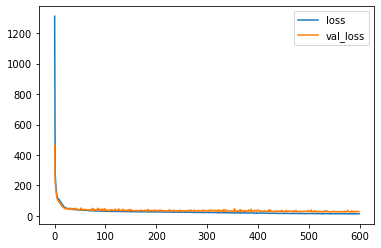

In [213]:
losses.plot()

(0, 200)

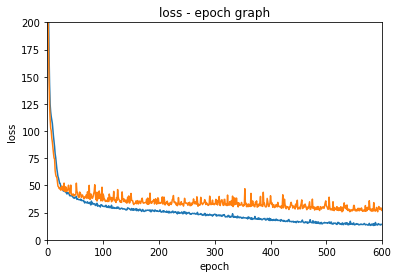

In [214]:
fig, ax= plt.subplots()
ax.plot(losses)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,600]) # focusing on the given x values
ax.set_ylim([0,200]) # focusing on the given y values

In [215]:
y_pred = model.predict(X_test)

In [216]:
eval_metrics(y_test, y_pred)

r2_score: 0.894834583213999 
 mae: 3.821283382767613 
 mse: 27.09869799183634 
 rmse: 5.20564097800034


In [217]:
explained_variance_score(y_test, y_pred)

0.8997333035799243

In [218]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(206,)}
compare=pd.DataFrame(my_dict)

In [219]:
model.evaluate(X_train, y_train, verbose=0)

15.025884628295898

In [220]:
model.evaluate(X_test, y_test, verbose=0)

27.098697662353516

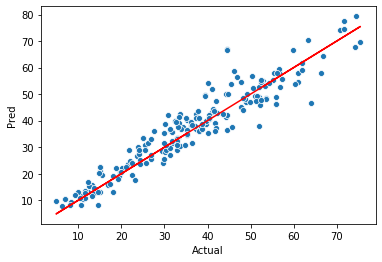

In [221]:
sns.scatterplot(x="Actual", y="Pred", data=compare)
plt.plot(y_test,y_test,'r');

In [243]:
model = Sequential()

model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
#model.add(Dense(22, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [244]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 15, restore_best_weights=True)

In [245]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
26/26 [==============================] - 0s 6ms/step - loss: 1546.0940 - val_loss: 1527.0135
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 1559.7620 - val_loss: 1523.4802
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 1566.5932 - val_loss: 1517.1389
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 1537.4907 - val_loss: 1508.0413
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 1511.0249 - val_loss: 1494.1423
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 1546.5798 - val_loss: 1473.3043
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 1469.9531 - val_loss: 1440.3354
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 1443.8161 - val_loss: 1390.7617
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 1414.1695 - val_loss: 1320.5299
Epoch 10/100
26/26 [==============================] - 0

26/26 [==============================] - 0s 9ms/step - loss: 124.3450 - val_loss: 110.2489
Epoch 80/100
26/26 [==============================] - 0s 8ms/step - loss: 117.9538 - val_loss: 109.5148
Epoch 81/100
26/26 [==============================] - 0s 9ms/step - loss: 116.7651 - val_loss: 108.9418
Epoch 82/100
26/26 [==============================] - 0s 9ms/step - loss: 114.4921 - val_loss: 108.3882
Epoch 83/100
26/26 [==============================] - 0s 9ms/step - loss: 115.0844 - val_loss: 107.6927
Epoch 84/100
26/26 [==============================] - 0s 8ms/step - loss: 107.0711 - val_loss: 107.1188
Epoch 85/100
26/26 [==============================] - 0s 9ms/step - loss: 114.6378 - val_loss: 106.5285
Epoch 86/100
26/26 [==============================] - 0s 8ms/step - loss: 110.6764 - val_loss: 105.7257
Epoch 87/100
26/26 [==============================] - 0s 9ms/step - loss: 109.4565 - val_loss: 105.3159
Epoch 88/100
26/26 [==============================] - 0s 9ms/step - loss: 118

In [246]:
losses = pd.DataFrame(model.history.history)

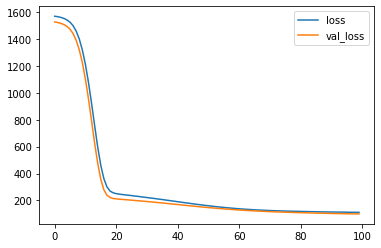

In [247]:
losses.plot()

(0, 200)

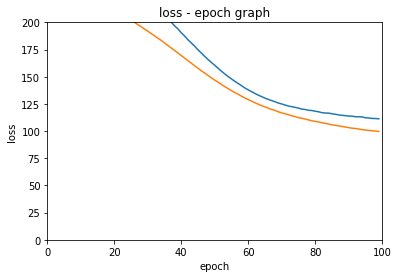

In [249]:
fig, ax= plt.subplots()
ax.plot(losses)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,100]) # focusing on the given x values
ax.set_ylim([0,200]) # focusing on the given y values

In [250]:
y_pred = model.predict(X_test)

In [251]:
eval_metrics(y_test, y_pred)

r2_score: 0.6129960867826885 
 mae: 7.94462188035539 
 mse: 99.7219664642718 
 rmse: 9.986088646926373


In [252]:
explained_variance_score(y_test, y_pred)

0.613008948062915

In [253]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(206,)}
compare=pd.DataFrame(my_dict)

In [254]:
model.evaluate(X_train, y_train, verbose=0)

110.93743133544922

In [255]:
model.evaluate(X_test, y_test, verbose=0)

99.72195434570312

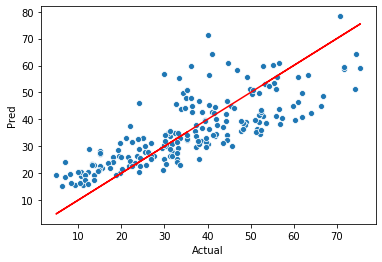

In [256]:
sns.scatterplot(x="Actual", y="Pred", data=compare)
plt.plot(y_test,y_test,'r');